In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [42]:
import numpy as np
import torch as th
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim
from torch.autograd import Variable

In [7]:
def plot_classification(ax, x, y, colors, legend):
    color_set = set(colors)
    for color in color_set:
        x_curr = []
        y_curr = []
        for i, c in enumerate(colors):
            if c == color:
                x_curr.append(x[i])
                y_curr.append(y[i])
        ax.scatter(x_curr, y_curr, c=color,label=legend[color])

legend = {'red': 0, 'blue': 1}

def color_mapping(cl):
    colors = ['red', 'blue', 'green']
    return colors[cl]
color_mapper = np.vectorize(color_mapping)

In [73]:
class LogisticRegression(nn.Module):
    def __init__(self, n_inputs, n_classes=2, bias=True):
        super().__init__()
        self.weights = nn.Linear(n_inputs, n_classes, bias=bias)
        init.xavier_uniform(self.weights.weight)
        #self.act_fun = nn.Sigmoid()
    
    def forward(self, x):
        x = self.weights(x)
        #x = self.act_fun(x)
        return x
    
def class_probs_to_class(arr):
    return np.argmax(arr, axis=1)

In [56]:
and_x = np.array([[0,0], [0,1], [1,0], [1,1]])
and_y = np.array([0, 0, 0, 1])

In [57]:
and_colors = color_mapper(and_y)

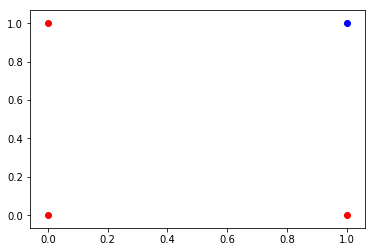

In [58]:
fig, ax = plt.subplots()
plot_classification(ax, and_x[:,0], and_x[:,1], and_colors, legend)

In [64]:
clf = LogisticRegression(2)
epochs = 30
lr = 0.7

In [65]:
optimizer = optim.Adam(clf.parameters(),lr=lr)
criterion = nn.CrossEntropyLoss()

In [66]:
for it in range(epochs):
    inputs = Variable(th.FloatTensor(and_x))
    labels = Variable(th.LongTensor(and_y))
    
    optimizer.zero_grad()
    output = clf(inputs)
    loss = criterion(output, labels)
    print(f'Loss at iteration {it + 1} is {loss.data[0]}')
    loss.backward()
    optimizer.step()

Loss at iteration 1 is 0.6768835186958313
Loss at iteration 2 is 0.512575089931488
Loss at iteration 3 is 0.36364054679870605
Loss at iteration 4 is 0.2952151596546173
Loss at iteration 5 is 0.21455992758274078
Loss at iteration 6 is 0.14726987481117249
Loss at iteration 7 is 0.11869797110557556
Loss at iteration 8 is 0.0977066159248352
Loss at iteration 9 is 0.07836484163999557
Loss at iteration 10 is 0.06629897654056549
Loss at iteration 11 is 0.05923076719045639
Loss at iteration 12 is 0.052484869956970215
Loss at iteration 13 is 0.044551342725753784
Loss at iteration 14 is 0.03653598204255104
Loss at iteration 15 is 0.029807932674884796
Loss at iteration 16 is 0.024841925129294395
Loss at iteration 17 is 0.021354522556066513
Loss at iteration 18 is 0.018804676830768585
Loss at iteration 19 is 0.0167385246604681
Loss at iteration 20 is 0.01490925531834364
Loss at iteration 21 is 0.013248253613710403
Loss at iteration 22 is 0.011777935549616814
Loss at iteration 23 is 0.0105349570512

[[ 6.76958704 -7.47664785]
 [ 1.19044161 -3.15566778]
 [ 2.77099371 -2.25751972]
 [-2.80815172  2.06345987]]
[0 0 0 1]


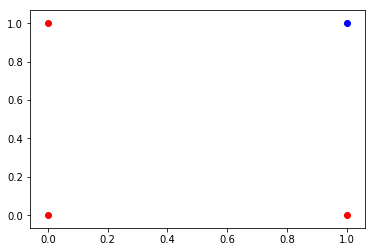

In [74]:
fig, ax = plt.subplots()
predicted_classes = class_probs_to_class(output.data.numpy())
print(output.data.numpy())
print(predicted_classes)
plot_classification(ax, and_x[:,0], and_x[:,1], color_mapper(predicted_classes), legend)